basic statistics about the distrebution of courses, divided by all parameters

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
print(sys.executable)


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

DB_PATH = "../data/huji_shnaton.db"



print(os.getcwd())
print(os.path.abspath("../data/huji_shnaton.db"))


conn = sqlite3.connect(DB_PATH)

df = pd.read_sql_query("SELECT * FROM cleaned_courses", conn)

df


/home/baruch/courses_analysis/venv/bin/python
/home/baruch/courses_analysis/analysis
/home/baruch/courses_analysis/data/huji_shnaton.db


,ID,Name_HE,Name_EN,Faculty,Semester,Language,Points,Exam_Type
0,1030,מיומנויות כתיבה אקדמית,Academic Writing,מכינה,A,He,0.0,מבחן מסכם
1,1031,מתמטיקה,Mathematics,מכינה,A,He,0.0,מבחן מסכם
2,1032,אנגלית,english,מכינה,A,En,0.0,בחינה בכתב
3,1033,קדם מכינה,kdam ATIDIM,מכינה,Y,He,0.0,מבחן מסכם
4,1043,עיונים בתרבות המערב כבסיס לחשיבה ולמחקר היסטוריים,Studies in Western Culture as a Basis for Hist...,מכינה,Y,He,0.0,משך הבחינה: 3.00 ש' בחינה בכתב
...,...,...,...,...,...,...,...,...
5835,99886,סוגיות נבחרות במדע העיסוק כבסיס לעשייה מקצועית...,Occupational science as a foundation for occup...,הפקולטה לרפואה,A,He,2.0,משך הבחינה: 2.00 ש' מבחן ממוחשב בחוות מחשבים
5836,99888,מבוא לשיטות מחקר איכותניות,Introduction to qualitative research methods,הפקולטה לרפואה,B,He,1.0,עבודה מסכמת
5837,99889,טראומה לאורך החיים וחיים לצידה,Trauma and life alongside it,הפקולטה לרפואה,A,He,2.0,
5838,99890,יזמות חברתית וטכנולוגית לקידום תפקוד ובריאות ח...,Social and technological innovation for promot...,הפקולטה לרפואה,B,He,3.0,


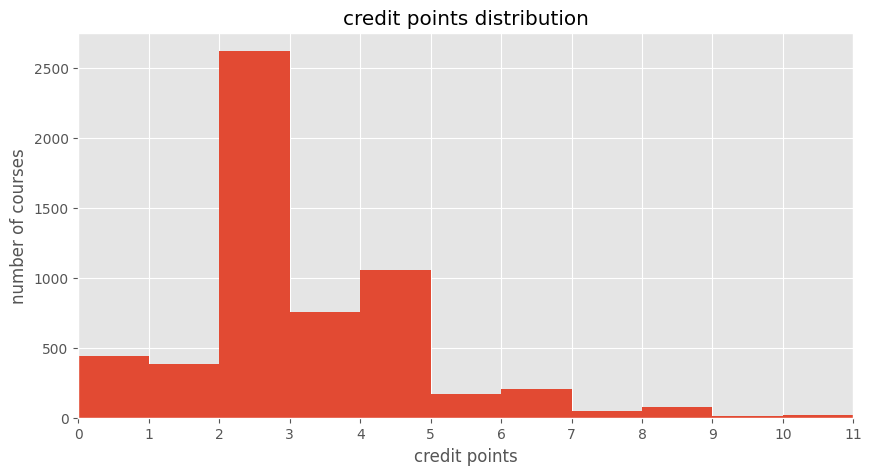

0 credits: 432 courses
1 credits: 355 courses
2 credits: 2588 courses
3 credits: 728 courses
4 credits: 1045 courses
5 credits: 166 courses
6 credits: 204 courses
7 credits: 49 courses
8 credits: 74 courses
9 credits: 12 courses
10 credits: 19 courses


In [3]:
points_df = df.dropna(subset=['Points'])
plot = points_df['Points'].plot(kind='hist', bins=(range(0,12)))
plot.set_xlim(0,11)
plot.set_xticks(range(0, 12, 1))
plt.title("credit points distribution")
plt.xlabel("credit points")
plt.ylabel("number of courses")
plt.show()

for i in range(0,11):
    print(f"{i} credits:", (points_df["Points"]==i).sum(), "courses")


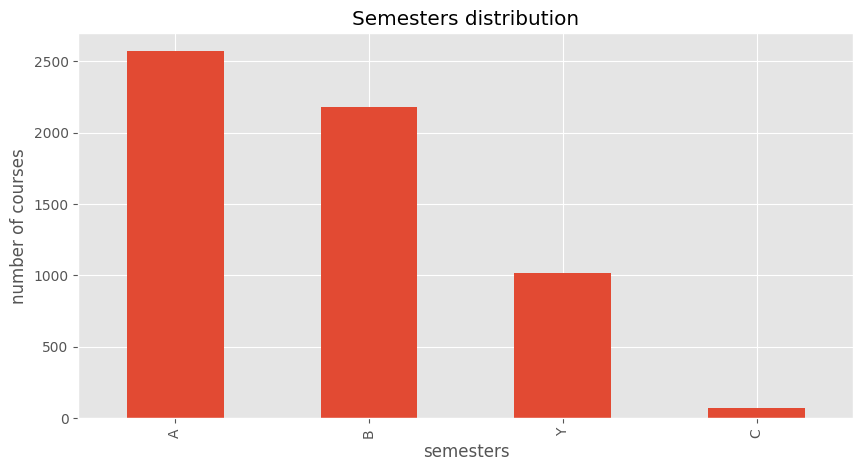

semester A courses: 2570
semester B courses: 2177
annual courses: 1018
semester C courses: 72


In [4]:
semester_df = df.dropna(subset=['Semester'])
semester_df = semester_df["Semester"].value_counts()
plot = semester_df.plot(kind='bar')
plt.title("Semesters distribution")
plt.xlabel("semesters")
plt.ylabel("number of courses")
plt.show()

for i,j in semester_df.items():
    if (i=='Y'):
        print(f"annual courses: {j}")
    else:
        print(f"semester {i} courses: {j}")

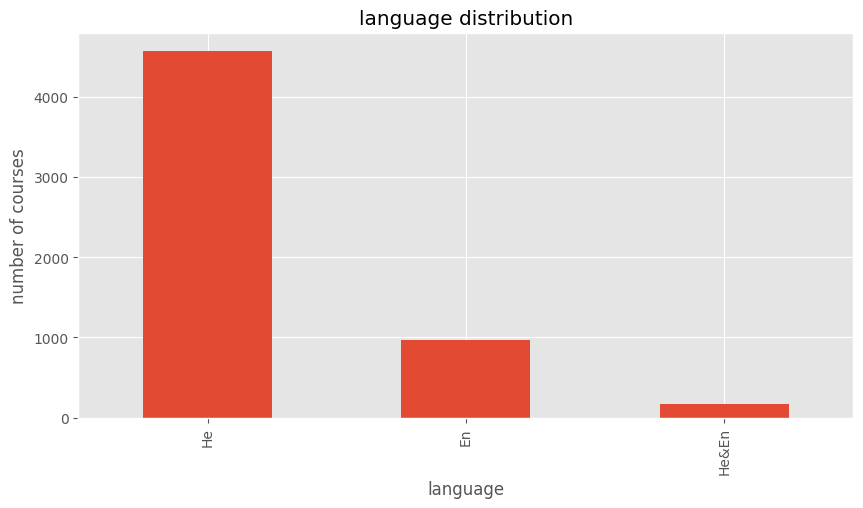

He language courses: 4576
En language courses: 963
He&En language courses: 166
all languages ​​in which courses are taught (including language-courses):  13


In [5]:
language_df = df.dropna(subset=['Language'])
language_df = language_df["Language"].value_counts()
language_df = language_df[language_df>100] #drop all language courses
plot = language_df.plot(kind='bar')
plt.title("language distribution")
plt.xlabel("language")
plt.ylabel("number of courses")
plt.show()

for i,j in language_df.items():
        print(f"{i} language courses: {j}")
print("all languages ​​in which courses are taught (including language-courses): ", df["Language"].nunique())

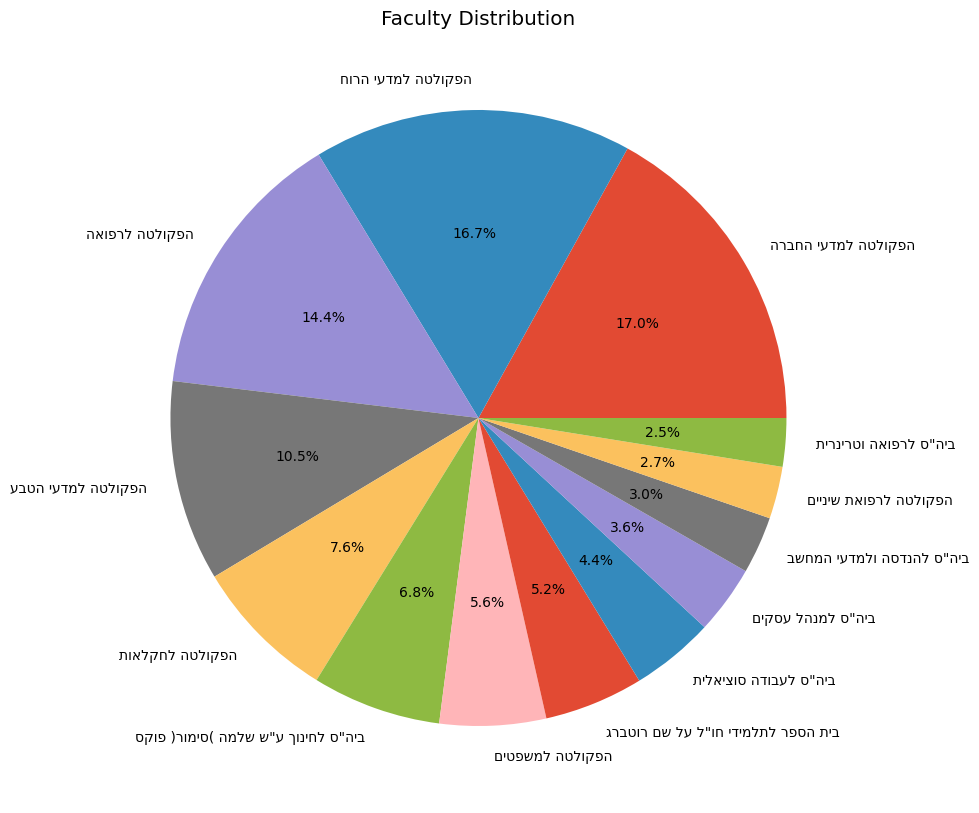

הפקולטה למדעי החברה
הפקולטה למדעי הרוח
הפקולטה לרפואה
הפקולטה למדעי הטבע
הפקולטה לחקלאות
ביה"ס לחינוך ע"ש שלמה (סימור) פוקס
הפקולטה למשפטים
בית הספר לתלמידי חו"ל על שם רוטברג
ביה"ס לעבודה סוציאלית
ביה"ס למנהל עסקים
ביה"ס להנדסה ולמדעי המחשב
הפקולטה לרפואת שיניים
ביה"ס לרפואה וטרינרית
תכניות מיוחדות
ביה"ס לבריאות הציבור
מכינה
מרכז אדמונד ולילי ספרא למדעי המוח
תלמידי תיכון


In [ ]:
df_faculty = df['Faculty'].value_counts()
df_faculty.index = df_faculty.index.str[::-1]


plt.figure(figsize=(10, 10))
df_faculty[df_faculty>100].plot(kind='pie', autopct='%1.1f%%', ylabel='')
plt.title("Faculty Distribution")
plt.show()


for index, val in df_faculty.items():
    print((index[::-1]))